In [1]:
import numpy as np
import skimage
from matplotlib import pyplot as plt
import cv2
import math
import skimage.io as io
from scipy import ndimage

In [2]:
img_path = "/home/dic/Desktop/seimens/Patient 387/T2Wcopy(n)/image1.png"
img = io.imread( img_path )

(368, 448, 3)


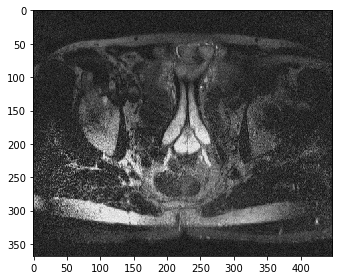

In [3]:
io.imshow(img)
img = skimage.color.gray2rgb(img)
print(img.shape)

In [20]:
dst1 = skimage.restoration.denoise_wavelet(img, 0.5, wavelet = 'db3')
ds1 = ndimage.median_filter(dst1,4)
dst2 = skimage.restoration.denoise_wavelet(img, 0.5, wavelet = 'haar')
ds2 = ndimage.median_filter(dst1,4)
dst3 = skimage.restoration.denoise_wavelet(img, 0.5, wavelet = 'sym9')
ds3 = ndimage.median_filter(dst3,4)

In [56]:
dst=np.zeros((368,448,3))
for i in range(0,368):
    for j in range(0,448):
        for k in range(0,3):
            dst[i][j][k] = (( ds2[i][j][k])**2 + (ds3[i][j][k])**2 + (ds1[i][j][k])**2)/3

In [57]:
ds = ndimage.median_filter(dst,4)
print(ds)

[[[0.01421434 0.01421434 0.01421434]
  [0.01421434 0.01421434 0.01421434]
  [0.01565467 0.01565467 0.01565467]
  ...
  [0.02243364 0.02243364 0.02243364]
  [0.01986644 0.01986644 0.01986644]
  [0.01769022 0.01769022 0.01769022]]

 [[0.01421434 0.01421434 0.01421434]
  [0.01421434 0.01421434 0.01421434]
  [0.01565467 0.01565467 0.01565467]
  ...
  [0.02243364 0.02243364 0.02243364]
  [0.02026974 0.02026974 0.02026974]
  [0.01892361 0.01892361 0.01892361]]

 [[0.01353972 0.01353972 0.01353972]
  [0.01353972 0.01353972 0.01353972]
  [0.01565467 0.01565467 0.01565467]
  ...
  [0.02248416 0.02248416 0.02248416]
  [0.02102657 0.02102657 0.02102657]
  [0.02097594 0.02097594 0.02097594]]

 ...

 [[0.02383009 0.02383009 0.02383009]
  [0.02383009 0.02383009 0.02383009]
  [0.02606037 0.02606037 0.02606037]
  ...
  [0.01825084 0.01825084 0.01825084]
  [0.01825974 0.01825974 0.01825974]
  [0.01842571 0.01842571 0.01842571]]

 [[0.02375161 0.02375161 0.02375161]
  [0.02375161 0.02375161 0.02375161]


In [53]:
def psnr(img1, img2):
#     mse=skimage.measure.compare_mse(img1,img2)
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [54]:
orig_img = cv2.imread("/home/dic/Desktop/seimens/Patient 387/T2Wcopy/image1.png")

orig_img = orig_img/float(255)
# orig_img = skimage.color.gray2rgb(orig_img)

In [58]:
p = psnr(orig_img,ds)
print(p)
p2 = psnr(orig_img,ds1)
print("db3",p2)
p3 = psnr(orig_img,ds2)
print("haar",p3)
p4 = psnr(orig_img,ds3)
print("sym9",p3)


65.65365466432688
db3 67.05495106313282
haar 67.05495106313282
sym9 67.05495106313282


In [59]:
io.imsave("/home/dic/Desktop/wavelet/combo.png",ds)
io.imsave("/home/dic/Desktop/wavelet/db3.png",ds1)
io.imsave("/home/dic/Desktop/wavelet/haar.png",ds2)
io.imsave("/home/dic/Desktop/wavelet/sym9.png",ds3)